In [11]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [33]:
with open('PowerMethodSVD Run Jan 23/jan23_SVD_test1.json') as json_file:
    run1 = json.load(json_file)
    
with open('PowerMethodSVD Run Jan24 1/jan24_SVD_test1.json') as json_file:
    run2 = json.load(json_file)
    
with open('PowerMethodSVD Run Jan24 2/jan24_SVD_test2.json') as json_file:
    run3 = json.load(json_file)
    
with open('PowerMethodSVD Run Jan24 3/jan24_SVD_test3.json') as json_file:
    run4 = json.load(json_file)

In [84]:
matrix_sizes = ['10K_40K', '20K_80K', '40K_160K', "80K_320K"]
buffer_sizes = [0, 5, 10, 20]

def make_key(matrix_size, k=10, buffer=0, run=0):
    loc = "('/nfs/pool002/users/tnonet/"
    if matrix_size not in matrix_sizes:
        raise Exception
    
    key = "{}{}', {}, {}, {})".format(loc, matrix_size, k, buffer, run)
    return key
    
def organize_run_data(run):
    tols = run[0]
    start = run[1]
    end = run[2]
    return {'tol':tols, 'time':round(end-start)}

# Accuracy vs Buffer Size

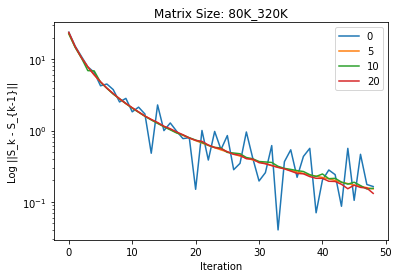

In [72]:
matrix_size = '80K_320K'
experiment = run4
offset = 2

for b in buffer_sizes:
    key = make_key(matrix_size, k=10, buffer=b)
    run_data = organize_run_data(run1[key])
    plt.plot(run_data['tol'][offset:], label=b)
    
plt.xlabel("Iteration")
plt.ylabel('Log ||S_k - S_{k-1}||')
plt.yscale('log')
plt.title("Matrix Size: {}".format(matrix_size))
plt.legend()
plt.show()

# Accuracy vs Size

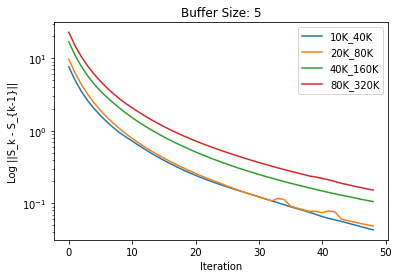

In [73]:
b = 5
experiment = run4
offset = 2

for matrix_size in matrix_sizes:
    key = make_key(matrix_size, k=10, buffer=b)
    run_data = organize_run_data(run1[key])
    plt.plot(run_data['tol'][offset:], label=matrix_size)
    
plt.xlabel("Iteration")
plt.yscale('log')
plt.ylabel('Log ||S_k - S_{k-1}||')
plt.title("Buffer Size: {}".format(b))
plt.legend()
plt.show()

# Run Time vs Buffer Size vs Matrix Size

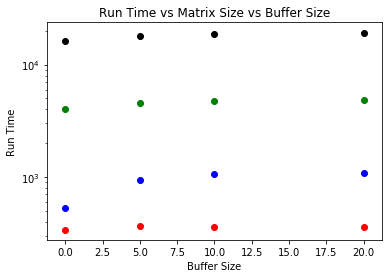

In [82]:
experiment = run4
offset = 2
matrix_size_to_color = dict(zip(matrix_sizes, ['red', 'blue', 'green', 'black']))

for matrix_size in matrix_sizes:
    for b in buffer_sizes:
        key = make_key(matrix_size, k=10, buffer=b)
        run_data = organize_run_data(run1[key])
        plt.scatter(b, run_data['time'], color=matrix_size_to_color[matrix_size])
    
plt.xlabel("Buffer Size")
plt.ylabel('Run Time')
plt.yscale('log')
plt.title("Run Time vs Matrix Size vs Buffer Size")
plt.show()

# Run Time vs Sparsity

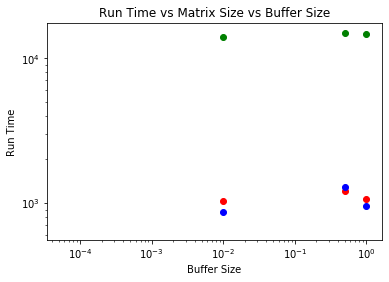

In [87]:
exps = [run2, run3, run4]
exps_to_sparisty = [1, .5, .01]
buffer = 0

offset = 2


for run_number, run in enumerate(exps):
    for matrix_size in matrix_sizes:
        key = make_key(matrix_size, k=10, buffer=b)
        try:
            run_data = organize_run_data(run[key])
            plt.scatter(exps_to_sparisty[run_number], run_data['time'], color=matrix_size_to_color[matrix_size])
        except:
            pass
          
plt.xlabel("Buffer Size")
plt.ylabel('Run Time')
plt.yscale('log')
plt.xscale('log')
plt.title("Run Time vs Matrix Size vs Buffer Size")
plt.show()

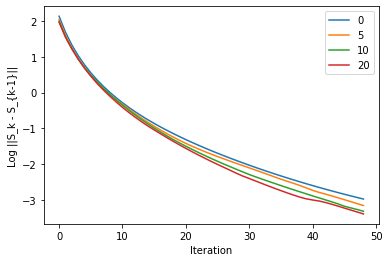

In [29]:
plt.plot(np.log(run1["('/nfs/pool002/users/tnonet/10K_40K', 10, 0, 0)"][0][2:]), label='0')
plt.plot(np.log(run1["('/nfs/pool002/users/tnonet/10K_40K', 10, 5, 0)"][0][2:]), label='5')
plt.plot(np.log(run1["('/nfs/pool002/users/tnonet/10K_40K', 10, 10, 0)"][0][2:]), label='10')
plt.plot(np.log(run1["('/nfs/pool002/users/tnonet/10K_40K', 10, 20, 0)"][0][2:]), label='20')
plt.xlabel("Iteration")
plt.ylabel('Log ||S_k - S_{k-1}||')
plt.legend()
plt.show()

In [7]:
run1["('/nfs/pool002/users/tnonet/10K_40K', 10, 0, 0)"][0]

[nan,
 126224830.94524643,
 8.40861764627844,
 5.410549942755233,
 3.7901013664819536,
 2.8134413322924456,
 2.1769156346212717,
 1.7382612075044186,
 1.4227101237658841,
 1.1878060289578105,
 1.0079006519908287,
 0.8667902961944789,
 0.753871247531636,
 0.6619667538024765,
 0.5860704338085332,
 0.5225971959063773,
 0.4689205215621011,
 0.4230777632259984,
 0.3835772246570521,
 0.34926849543395244,
 0.3192530650978953,
 0.2928212569001273,
 0.2694068314628301,
 0.24855376685750746,
 0.2298916182396268,
 0.21311702599405494,
 0.1979796850252641,
 0.18427158295276774,
 0.17181865655918496,
 0.16047425687008612,
 0.15011398484161229,
 0.14063158146672383,
 0.13193564160553864,
 0.12394697999377581,
 0.1165965184843072,
 0.10982359177784289,
 0.10357458907304075,
 0.09780186439001205,
 0.09246286048341727,
 0.08751940142561103,
 0.08293711753784294,
 0.0786849736921028,
 0.07473487815954882,
 0.07106135433712356,
 0.06764126183055053,
 0.06445355670702976,
 0.061479083345833026,
 0.0587003